<img src="datamecum_logo.png" align="right" style="float" width="400">
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Introducción a Python.</h2></font> 
<font color="#6E6E6E"><h2 align="left">Seaborn.</h2></font> 

#### Marcelino Martínez Sober, Juan Gómez-Sanchis


- <a href='#Introseborn'>Introducción Seaborn</a>

- <a href='#SeabornPandas'>Seaborn y Pandas</a>

- <a href='#subplots'>Subplots en Seaborn </a>

- <a href='#custom'>Personalizando los gráficos en Seaborn </a>

- <a href='#line'>Gráficos de línea. Series temporales en Seaborn </a>
     
- <a href='#cat'>Visualizando variables categóricas en Seaborn </a>

- <a href='#boxplot'>Boxplots en Seaborn </a>

- <a href='#pointplot'>Point Plots. Coordenadas Paralelas en Seaborn </a>

- <a href='#violin'>Diagramas de violín en Seaborn </a>

- <a href='#pairs'>Gráficos de scattering emparejados en Seaborn </a>

- <a href='#custom2'>Personalizando a través del estilo en Seaborn </a>

- <a href='#Titles'>Títulos y etiquetas en ejes x e y. </a>

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 7] # 
#sns.reset_orig()
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5, "figsize":[13, 7]}) #Me permite fijar por defecto propiedades de las figuras


## <a id='Introseborn'>Introducción Seaborn</a>

<img src="./images/Figura1.png" align="center" style="float" width="1000">


<img src="./images/Figura2.png" align="center" style="float" width="1000">

<img src="./images/Figura3.png" align="center" style="float" width="1000">

<img src="./images/Figura4.png" align="center" style="float" width="1000">

<img src="./images/Figura5.png" align="center" style="float" width="1000">

<img src="./images/Figura6.png" align="center" style="float" width="1000">

## Ejercicio 1

* Carga las librerias ``seaborn``, ``matplotlib.pyplot`` y ``pandas``. 
* Carga el conjunto de datos ``../data_seaborn_jgx/countries-of-the-world.csv``
* Crea un gráfico de scatter donde se representen las 100 primeras muestras de las variables ``GDP....per.capita.`` en el eje x  y ``Phones..per.1000.`` en el eje y.
* Crea un gráfico de barras donde se represente en el eje y  el numéro de muestras la variable categórica ``Region``.

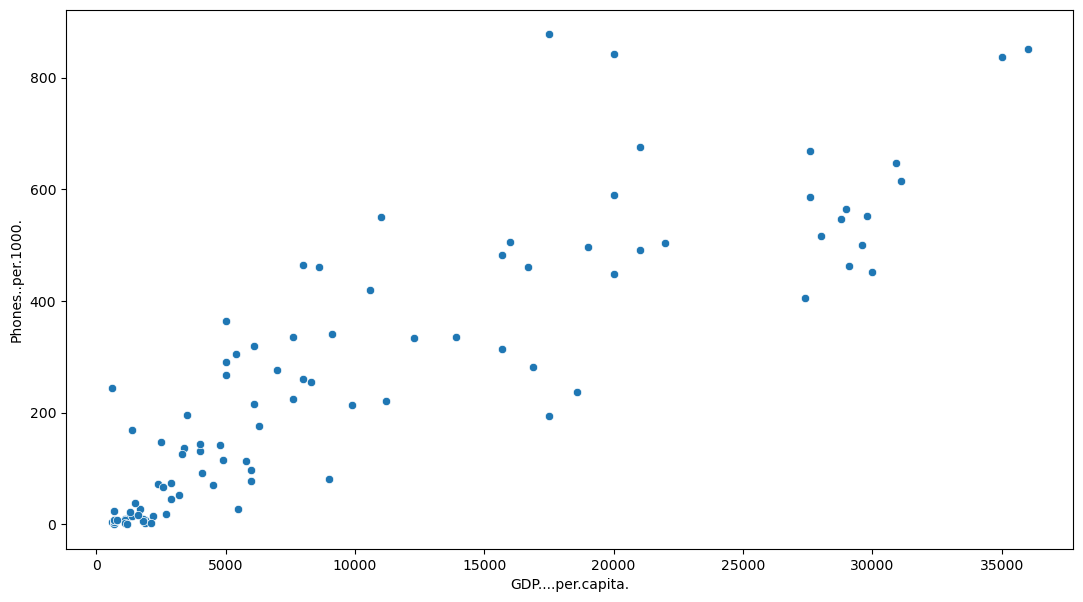

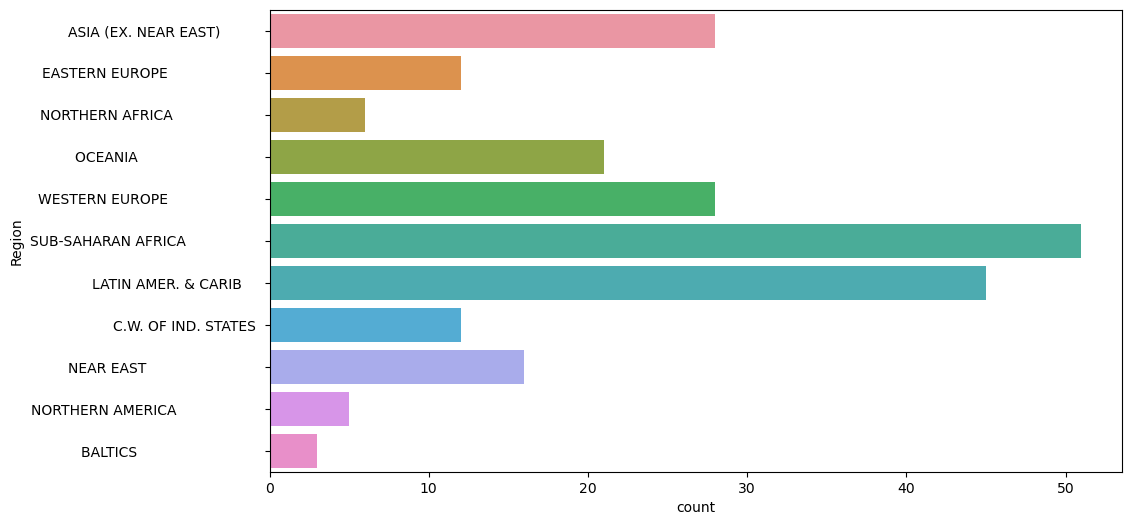

In [2]:
#1.1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

#1.2
datos=pd.read_csv("../data_seaborn_jgx/countries-of-the-world.csv")
datos.dtypes

#1.3
plt.figure(figsize=(13, 7))
sns.scatterplot(x=datos.loc[:99,"GDP....per.capita."], y=datos.loc[:99,"Phones..per.1000."])
plt.show()

#1.4
plt.figure(figsize=(11, 6))
sns.countplot(y=datos["Region"])
plt.show()

Vamos a ir viendo algunas de las funcionalidades de **Seaborn** y como combina perfectamente opciones de manejo de dataframes con opciones de visualización. Carguemos el fichero ``../data_seaborn_jgx/masculinity.csv``.

In [3]:
#Preparo el data set para los ejercicios

nRowsRead = 1000
masculinity= pd.read_csv('../data_seaborn_jgx/raw-responses.csv', delimiter=',', nrows = nRowsRead)
masculinity_clean=masculinity.copy().loc[:,["Unnamed: 0", "age3","q0001","q0002"]]
masculinity_clean.columns = ['participant_id','age','how_masculine','how_important']
masculinity_clean=masculinity_clean.sort_values('age')
masculinity_clean.to_csv('../data_seaborn_jgx/masculinity.csv',index=False)


## <a id='SeabornPandas'>Seaborn y Pandas</a>

<img src="./images/figura7.png" align="center" style="float" width="1000">

In [4]:
df= pd.read_csv('../data_seaborn_jgx/masculinity.csv', delimiter=',')
df.head()

participant_id      age       how_masculine         how_important
0             171  18 - 34  Somewhat masculine    Somewhat important
1             145  18 - 34  Not very masculine  Not at all important
2              63  18 - 34  Not very masculine    Somewhat important
3             591  18 - 34  Somewhat masculine  Not at all important
4             437  18 - 34      Very masculine     Not too important

<img src="./images/figura8.png" align="center" style="float" width="1000">

Te puedes fijar como seaborn se integra con pandas, utilizando como argumento ``data`` el data frame a representar y como argumento ``x`` el nombre de la variable. Además fíjate com seaborn ha añadido el nombre de la columna representada en el eje x.

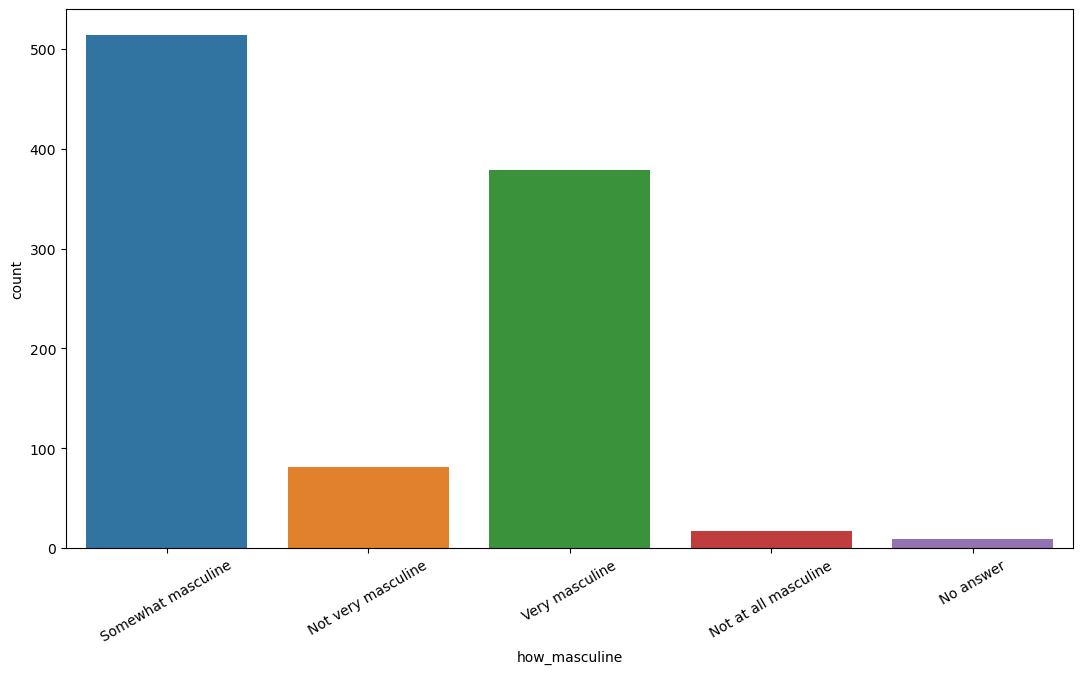

In [5]:
plt.figure(figsize=(13, 7))
g=sns.countplot(x="how_masculine",data=df)

plt.xticks(rotation=30)

plt.show()

## Introduciendo color con una variable.

Con seaborn es sencillo introducir color en un gráfico a traves de una  variable categórica. Vemos algunos ejemplos de lo que estamos diceiendo. Vamos a utilizar el conjunto de datos **tips**  incluido en la librería seaborn.

<img src="./images/figura9.png" align="center" style="float" width="1000">

El conjunto tips  contiene datos de hábitos en la donación de propinas en bares en función de algunos variables como si el cliente es fumador.

<img src="./images/figura10.png" align="center" style="float" width="1000">

Vamos a hacer un grafico de scatering con la función ``scatterplot`` de seaborn. En el eje x representamos la variable ``tip`` y en el eje x la variable ``total_bill``

<img src="./images/figura11.png" align="center" style="float" width="1000">

 Añadiendo el argumento ``hue`` introducimos color en el gráfico de dispersión en base a la variable categórica ``smoker``

<img src="./images/figura12.png" align="center" style="float" width="1000">

Cambiar el orden de los factores de la leyenda es tan sencillo como utilizar el argumento ``hue_order``

<img src="./images/figura13.png" align="center" style="float" width="1000">

Del mismo modo podemos personalizar el color de los puntos definiendo umna paleta de colores a traves de un diccionario de python y el argumento ``palette`` de la función ``scatterplot`` 

<img src="./images/figura14.png" align="center" style="float" width="1000">

No es necesario recordarlos de memoria, pero la gama de colores es muy amplia, pudiendo utilizar la notación de matplotlib o la codificación de colores de html.

<img src="./images/figura15.png" align="center" style="float" width="1000">

En el ejemplo previo estamos utilizando la notación de colores de html para definir la paleta de colores utilizada  en el gráfico.

<img src="./images/figura16.png" align="center" style="float" width="1000">

El argumento ``hue`` puede ser utilizado en otro tipos de gráficos, en el ejemplo previo hemos utilizado la opción de codificar por colores un gráfico de tipo ``countplot``

## Ejercicio 2

* Carga el conjunto de datos contenido en el fichero ``../data_seaborn_jgx/student-alcohol-consumption.csv``.
* Crea un gráfico de scattering representando la variable ausencias (``absences``) en el eje x y la nota (``G3``) en el eje y. Queremos distinguir entre los alumnos de zonas urbanas y rurales (variable ``location``) por color. 
* Crea un gráfico de barras con la función ``countplot`` representando en la variable x la variable (``school``). Queremos segmentar las barras en dos grupos  zonas urbanas y rurales (variable ``location``) por color. Más especificamente el valor **Rural** en verde y el valor **Urban** en rojo. Recuerda utilizar el argumeto ``palette`` y definir un diccionario con los colores previamente.

In [6]:
#2.1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

student_data= pd.read_csv('../data_seaborn_jgx/student-alcohol-consumption.csv', delimiter=',')
student_data.head(5)


Unnamed: 0 school sex  age famsize Pstatus  Medu  Fedu  traveltime  \
0           0     GP   F   18     GT3       A     4     4           2   
1           1     GP   F   17     GT3       T     1     1           1   
2           2     GP   F   15     LE3       T     1     1           1   
3           3     GP   F   15     GT3       T     4     2           1   
4           4     GP   F   16     GT3       T     3     3           1   

   failures  ... goout Dalc Walc health absences  G1  G2  G3  location  \
0         0  ...     4    1    1      3        6   5   6   6     Urban   
1         0  ...     3    1    1      3        4   5   5   6     Urban   
2         3  ...     2    2    3      3       10   7   8  10     Urban   
3         0  ...     2    1    1      5        2  15  14  15     Urban   
4         0  ...     2    1    2      5        4   6  10  10     Urban   

      study_time  
0   2 to 5 hours  
1   2 to 5 hours  
2   2 to 5 hours  
3  5 to 10 hours  
4   2 to 5 hours  

[5 rows x 30 columns]

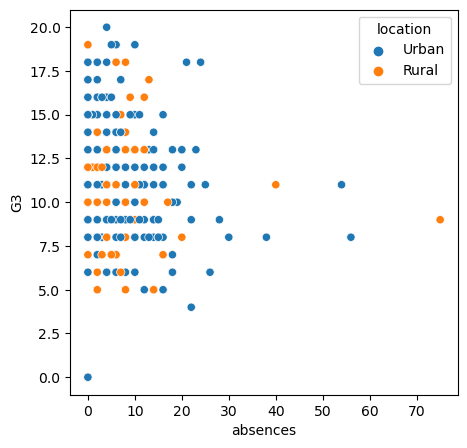

In [7]:
#2.2
plt.figure(figsize=(5, 5))
sns.scatterplot(x="absences",y="G3",data=student_data, hue="location")
plt.show()

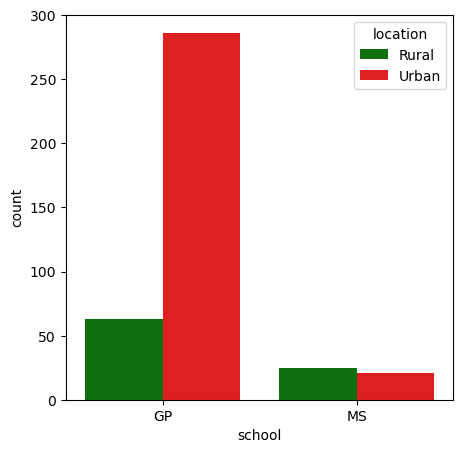

In [8]:
#2.3
plt.figure(figsize=(5, 5))
paleta_color={"Rural":"green", "Urban":"red"}
sns.countplot(x="school",hue="location",data=student_data,hue_order=["Rural","Urban"],palette=paleta_color)
plt.show()

## <a id='subplots'>Subplots en Seaborn </a>

<img src="./images/figura17.png" align="center" style="float" width="1000">

Hemos visto que una forma de introducir información de una variable categórica en un gráfico de scattering es mediante el argumento ``hue``.

<img src="./images/figura18.png" align="center" style="float" width="1000">

No obstante, en ocasiones es interesante introducir la separción de esa variable categórica en diferentes subplots  de una misma figura constituyendo una gráfico relacional como el que vemos a continuación.  Para ello utilizaremos la función de seaborn ``relplot``.

<img src="./images/figura19.png" align="center" style="float" width="1000">



<img src="./images/figura20.png" align="center" style="float" width="1000">

Vamos a ver como empleando la función ``relplot`` podemos hacer graficos de scattering del mismo modo que ``scatterplot`` pero introduciendo la posibilidad de crear un gráfico relacional con subplots.  Los argumentos de ambas funciones son muy similares, lo veremos en los siguientes ejemplos. Fíjate que ``relplot`` permite definir diferentes tipos de gráficos, para ello tenemos el arguemento``kind``.

<img src="./images/figura21.png" align="center" style="float" width="1000">

Podemos incluir la información relacional con la variable ``smoker`` en columnas con el argumento ``col``

<img src="./images/figura22.png" align="center" style="float" width="1000">

o por filas  con el argumento ``row``....

<img src="./images/figura23.png" align="center" style="float" width="1000">

Incluso se puede incluir información de una variable en columnas y columnas simultaneamente  incluyendo los argumentos ``col`` y ``row`` en la misma función.

<img src="./images/figura24.png" align="center" style="float" width="1000">

Las posibilidades para disponer  los subplots en diferentes números de columnas se controla con el argumento ``col_wrap``



<img src="./images/figura25.png" align="center" style="float" width="1000">

Las posibilidades son muy amplias, incluso podemos especificar el orden en el que aparecen los subplot en el gráfico relacional con el argumento ``col_order``

## <a id='custom'>Personalizando los gráficos en Seaborn </a>

<img src="./images/figura26.png" align="center" style="float" width="1000">

Ya hemos visto algunas propiedades de personalización como el color o la disposición. A continuación veremos ejemplos de personalización relacionada con el tamaño, la forma o la transparencia de los puntos

<img src="./images/figura27.png" align="center" style="float" width="1000">

El argumento ``size`` permite relacionar el tamaño de los puntos con una variable numérica.

<img src="./images/figura28.png" align="center" style="float" width="1000">

Podemos combinar más de una posibilidad de personalización en el mismo gráfico, como observamos en el ejemplo de arriba, en el que relacionamos el tamaño del punto ``size`` y el color ``hue`` con la variable ``size``  del data frame. Combinar dos propiedades del gráfico con una única variable puede ayudar a enfatizar la información de esa variable.

<img src="./images/figura29.png" align="center" style="float" width="1000">

El argumento ``style`` permite relacionar el tipo de punto asociado a una variable categórica.

<img src="./images/figura30.png" align="center" style="float" width="1000">

La transparencia se controla con el argumento ``alpha`` entre 0 y 1, siendo 0 puntos completamente transparentes y 1 completamente opacos.

## Ejercicio 3

* A partir del data set ``student_data`` cargado en el ejercicio 2, crea un gráfico de scattering representando la variable ausencias (``absences``) en el eje x y la nota (``G3``) en el eje y, utilzando la función ``relplot`` de seaborn. 
* Crea un gráfico relacional basado en un scatter plot como el del apartado anterior, en el que cada subplot estén los puntos segmentados por la variable ``study_time`` dispuestos en columnas. ¿Cómo cambiaría el código para disponer la información en filas?
* Queremos estudiar si existe algún tipo de relación lineal entre las variables ``G3`` y ``G1``, y si esta relación está relacionada con si el estudiante recibe refuerzo de la escuela (``schoolsup``) o de la familia (``famsup``). Crea un gráfico relacional en el que la información relacionada con el soporte de la escuela debe de estar dispuesta en columnas y el relacionada con el soporte de la familia en filas (primero el valor "yes" y después el "no"). 

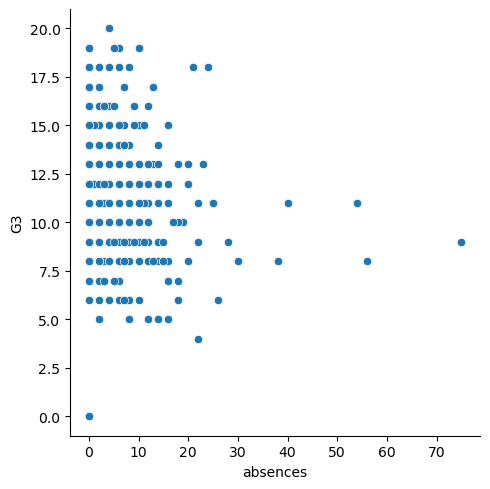

In [9]:
#3.1
#sns.reset_orig()
#fig.set_size_inches( 16, 10)
sns.relplot(x="absences", y="G3", data=student_data,
            kind="scatter")

plt.show()

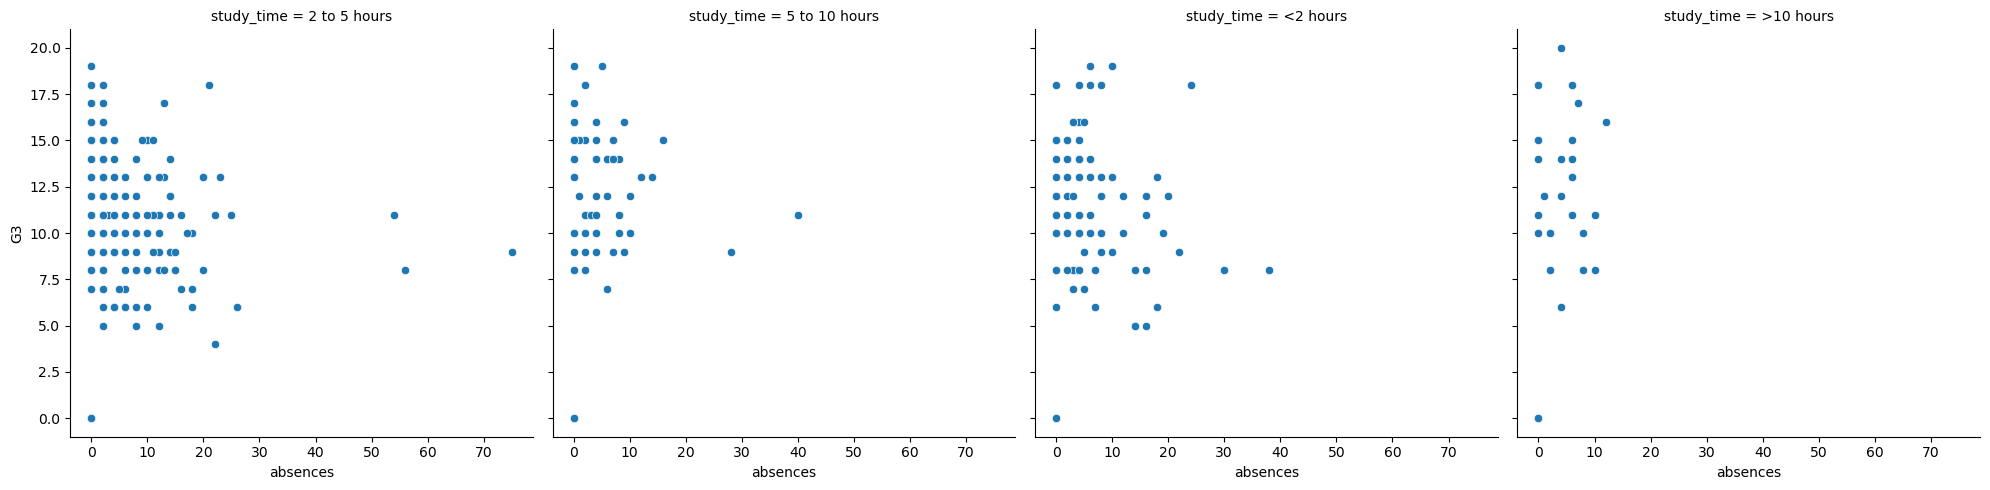

In [10]:
#3.2

#Dispuesto en columnas

#fig.set_size_inches( 16, 10)
#cambiando el argumento col por row conseguiriamos disponer la información en filas
sns.relplot(x="absences", y="G3", 
            data=student_data,
            kind="scatter",
            col="study_time")
plt.show()



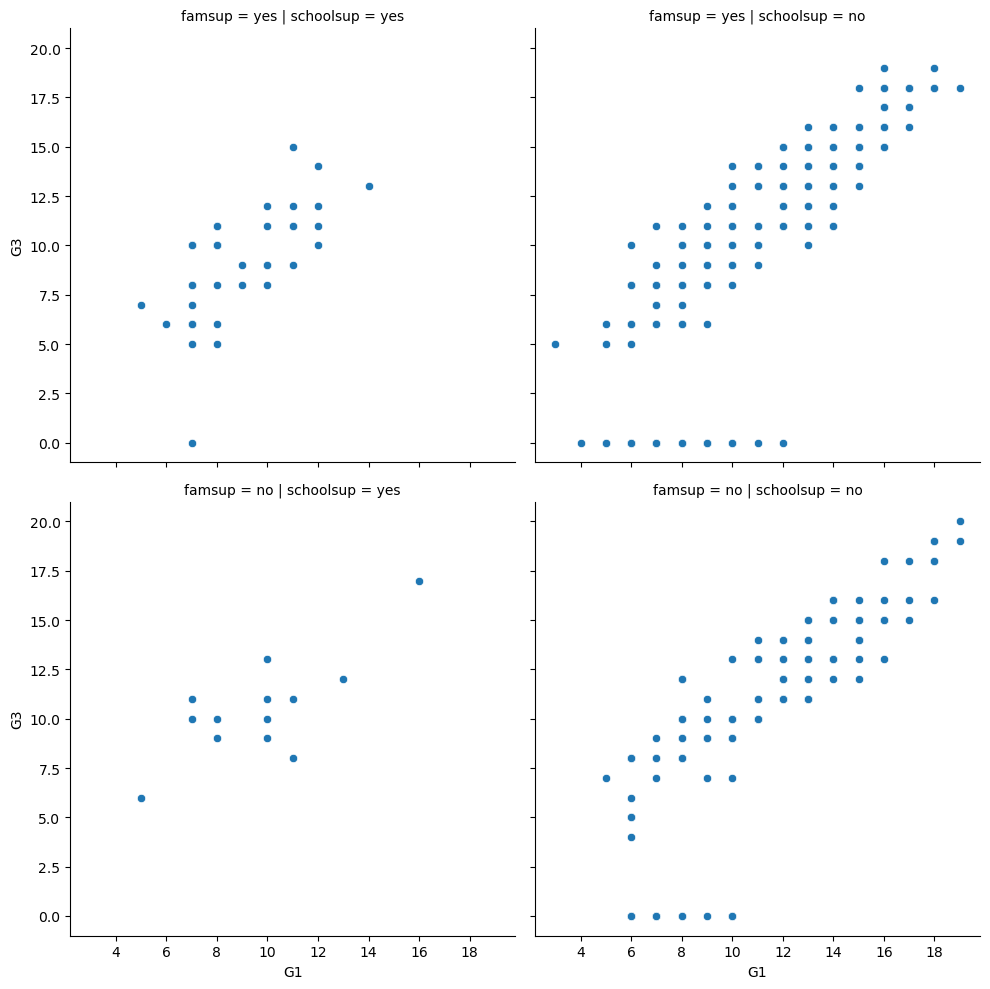

In [11]:
#3.3

# Organizamos los subplots en base a schoolsup en columnas y famsup en filas
sns.relplot(x="G1", y="G3", 
            data=student_data,
            kind="scatter", 
            col="schoolsup",col_order=["yes", "no"],
            row="famsup",row_order=["yes","no"])

# Show plot
plt.show()

## Ejercicio 4

* Carga el conjunto de datos contenido en el fichero ``../data_seaborn_jgx/mpg.csv``.
* Crea un gráfico de scatter utilizando ``relplot``  representando en el eje x la variable ``horsepower`` y en el eje y la variable ``mpg``. Del mismo modo haz que el tamaño de los puntos esté proporcionado por  la variable ``cylinders``. Para enfatizar más la diferencia haz que el color de los puntos también esté relacionado con la variable ``cylinders``. 
* Crea un gráfico de scatter utilizando ``relplot``  representando en el eje x la variable ``acceleration`` y en el eje y la variable ``mpg``. Del mismo modo haz que el símbolo de los puntos esté proporcionado por  la variable ``origin``. Para enfatizar más la diferencia haz que el color de los puntos también esté relacionado con la variable ``origin``. POr último, haz que los puntos tengan un grado de transparencia del 50%.

In [12]:
#4.1
mpg= pd.read_csv('../data_seaborn_jgx/mpg.csv', delimiter=',')
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

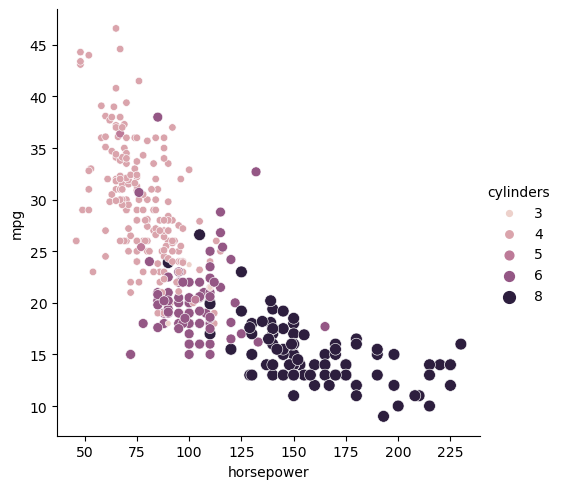

In [13]:
#4.2
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="horsepower", y="mpg", 
            data=mpg, kind="scatter", 
            size="cylinders",
            hue="cylinders")


plt.show()

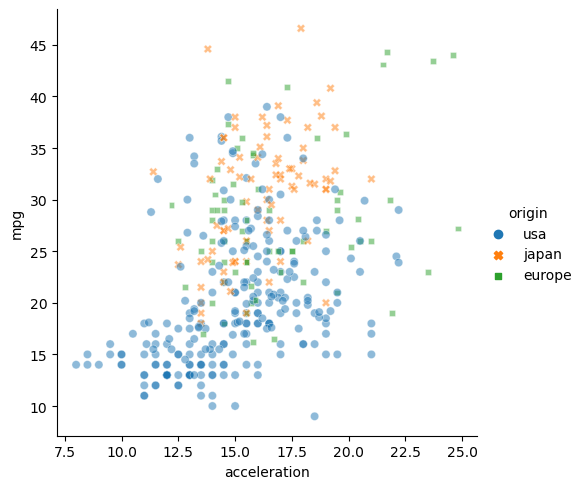

In [14]:
#4.3
sns.relplot(x="acceleration", y="mpg",
            data=mpg,
            kind="scatter",
            hue="origin",
            style="origin",
            alpha=0.5)
plt.show()

## <a id='line'>Gráficos de línea. Series temporales en Seaborn </a>

<img src="./images/figura31.png" align="center" style="float" width="1000">

En esta sección vamos a ver como implementar gráficos de línea a través de la función ``relplot``.

<img src="./images/figura32.png" align="center" style="float" width="1000">

Vamos a ver un ejemplo de este tipo de gráficos con series temporales de datos ambientales..

<img src="./images/figura33.png" align="center" style="float" width="1000">

Si los datos que tenemos representan una serie temporal, los gráficos de scattering no aportan demasiada información

<img src="./images/figura34.png" align="center" style="float" width="1000">

En cambio si empleamos como argumento ``kind="line"`` de ``relplot``, la serie temporal cobra sentido.

<img src="./images/figura35.png" align="center" style="float" width="1000">

Podemos agrupar la información de diferentes series temporales en base a una tercera variable categórica con el argumento ``style``. En este caso vamos  a representar una serie diferente para cada ubicación.


<img src="./images/figura36.png" align="center" style="float" width="1000">

Para enfatizar, ademas de cambiar el estilo de línea  podemos cambiar tambien el color con ``hue``.

<img src="./images/figura37.png" align="center" style="float" width="1000">

Añadir cada punto de la serie temporal con el argumento ``Markers=True``

<img src="./images/figura38.png" align="center" style="float" width="1000">

Eliminar las las líneas punteadas con el argumento ``dashes=False``

<img src="./images/figura39.png" align="center" style="float" width="1000">

Qué ocurre si tenemos más de una observación en el mismo instante temporal?

<img src="./images/figura41.png" align="center" style="float" width="1000">

``relplot`` lleva a cabo de manera automática un cálculo estadístico que por defecto es el intervalo de confianza al 95% de la distribución

<img src="./images/figura40.png" align="center" style="float" width="1000">

Ahorra trabajo!!!

<img src="./images/figura42.png" align="center" style="float" width="1000">

Podemos variar el tipo de intervalo de confianza, por ejemplo si queremos usar la deviación típica emplearemos el argumento  ``ci=sd``

<img src="./images/figura43.png" align="center" style="float" width="1000">

También podemos eliminar el intervalo de confianza cuando haya más de una muestra por instante temporal  con el argumento ``ci=None``, en este caso mostrará la media de todas las muestras.

## Ejercicio 5

* Carga el conjunto de datos contenido en el fichero ``../data_seaborn_jgx/mpg.csv``.
* Representa la serie temporal de la variable ``mpg`` a lo largo de los años (``model_year``). Explica el resultado que observas por pantalla. Por qué aparecen el intervalo de confianza?. Qué modificarías para que el intervalo de confianza fuera la desviación típica en lugar  del 95%?
* Representa la serie temporal de la variable ``horsepower`` a lo largo de los años (``model_year``). Elimina el intervalo de confianza de la representación  y haz que se represente una serie temporal de diferente color y diferente estilo de línea para cada valor de la variable ``origin``. Cómo hariamos que se vieran cada uno de los puntos de la serie temporal, además de las líneas?

In [15]:
#5.1
mpg= pd.read_csv('../data_seaborn_jgx/mpg.csv', delimiter=',')
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

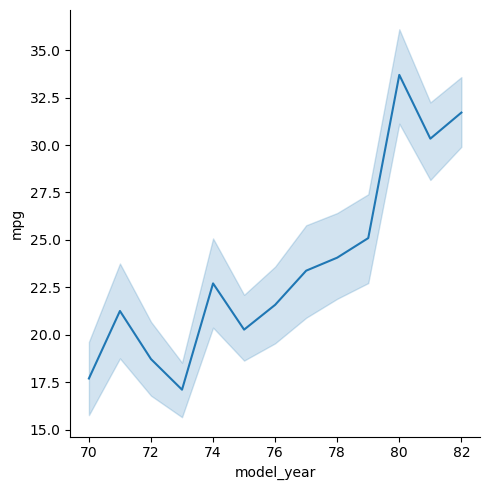

In [16]:
#5.2
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="model_year",y="mpg",
            data=mpg,
            kind="line")
plt.show()

#Sale el intervalo de confianza porque existe más de una muestra para el mismo instante temporal
# Añadiendo la opción ci="sd"

/Users/marsel/opt/anaconda3/envs/AED/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


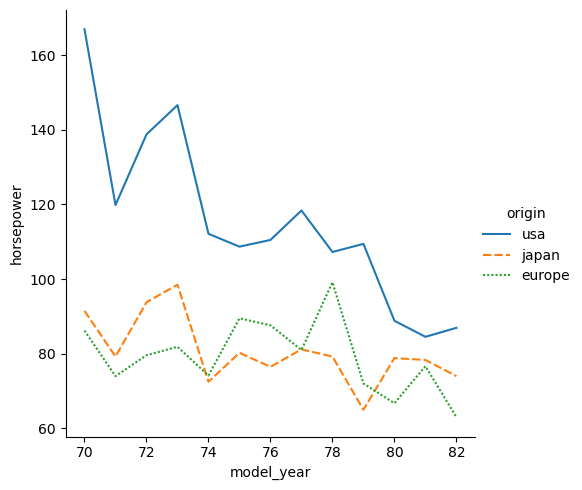

In [17]:
#5.3
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line", 
            ci=None, style="origin", hue="origin")


plt.show()

#Añadiendo la ópción markers=True

## <a id='cat'>Visualizando variables categóricas en Seaborn </a>

<img src="./images/figura44.png" align="center" style="float" width="1000">

Vimos al principio del tema la forma en la que la función ``countplot`` de ``seaborn``  permitia representar variables categóricas en gráficos de barra de frecuencia.


<img src="./images/figura45.png" align="center" style="float" width="1000">

Ahora vamos a ver la función ``catplot`` que es el equivalente de ``relplot`` para variables categóricas.

<img src="./images/figura46.png" align="center" style="float" width="1000">

Recordabamos como funcionaba ``countplot``?


<img src="./images/figura47.png" align="center" style="float" width="1000">

La extrapolación a la función ``catplot`` es sencilla, la dinámica es la misma que empleamos con ``relplot``. Empleamos el argumento ``kind="count"``

<img src="./images/figura48.png" align="center" style="float" width="1000">

Podemos definir el orden en el que se diponen las barras con el argumento ``order``

<img src="./images/figura49.png" align="center" style="float" width="1000">

Podemos representar gráficos de barras asociando la altura de la barra (variable cuantitativa)  a cada barra (variable categórica) en este caso tenemos que definir los argumentos ``x`` e ``y`` y el tipo de ``catplot`` con el argumento ``kind="bar"``


<img src="./images/figura50.png" align="center" style="float" width="1000">

Por defecto los intervalos de confianza al 95% son incluídos... Recordemos que la altura de la barra  viene dada por el valor medio de la distribución de la variable ``total_bill`` del  data set tips.

<img src="./images/figura51.png" align="center" style="float" width="1000">

Si queremos quitar los intervalos de confianza utilizaremos el argumento ``ci=None``

<img src="./images/figura52.png" align="center" style="float" width="1000">

Cambiar la orientación de las barras es sencillo, únicamente tenemos que cambiar las variables de los arguemtos ``x`` e ``y``.

## Ejercicio 6

* Carga el conjunto de datos contenido en el fichero ``../data_seaborn_jgx/young-people-survey-responses.csv``.
* Crea un gráfico de barras verticales donde se muestre la frecuencia de cada una de las categorías presentes en la variable ``Internet usage``. Utiliza la función de seaborn ``catplot`` para conseguir lo que te piden. Cómo conseguirías que las barras fueran horizontales?

* Crea dos variables nuevas en el dataframe. La primera, ``Age Category``,   tomará un valor de ``"younger than 21"`` y ``"older than 21"`` para aquellos individuos menores y mayores de 21 respectivamente. La segunda, ``Interested in Math``,  tomará un valor de ``False`` y ``True`` para aquellos individuos con una respuesta mayor que 3 en la variable encuestada ``Mathematics``.

* Crea un subplot repitiendo el gráfico de barras anterior, pero segmentando en cada subplot por los valores de la variable ``Age Category`` por columnas.

* Crea un gráfico de barras en el que en el eje x se visualice la variable ``Gender`` y en el eje y la proporción de los valores que toma la variable categórica ``Interested in Math``.

* Empleando el data frame ``student_data``,  crea un gráfico de barras, sin mostrar los intervalos de confianza,  en el que se muestre el valor médio de la variable ``G3`` para cada una de las categorías presentes en la variable ``study_time``. Ten en cuenta que sería deseable que las categorías presentes en ``study_time`` deberían mostrarse en el gráfico de manera ordenada. 


In [18]:
#6.1
survey_data= pd.read_csv('../data_seaborn_jgx/young-people-survey-responses.csv', delimiter=',')
survey_data.head()

Unnamed: 0  Music  Techno  Movies  History  Mathematics  Pets  Spiders  \
0           0    5.0     1.0     5.0      1.0          3.0   4.0      1.0   
1           1    4.0     1.0     5.0      1.0          5.0   5.0      1.0   
2           2    5.0     1.0     5.0      1.0          5.0   5.0      1.0   
3           3    5.0     2.0     5.0      4.0          4.0   1.0      5.0   
4           4    5.0     2.0     5.0      3.0          2.0   1.0      1.0   

   Loneliness  Parents' advice   Internet usage  Finances   Age  Siblings  \
0         3.0              4.0  few hours a day       3.0  20.0       1.0   
1         2.0              2.0  few hours a day       3.0  19.0       2.0   
2         5.0              3.0  few hours a day       2.0  20.0       2.0   
3         5.0              2.0  most of the day       2.0  22.0       1.0   
4         3.0              3.0  few hours a day       4.0  20.0       1.0   

   Gender Village - town  
0  female        village  
1  female           city  
2  female           city  
3  female           city  
4  female        village

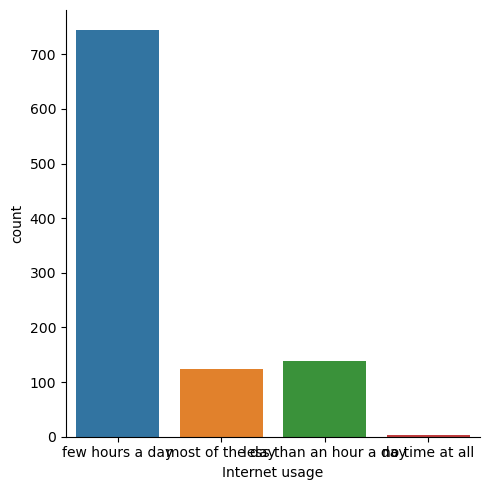

In [19]:
#6.2
sns.catplot(x="Internet usage",data=survey_data,kind="count")
plt.show()
#utilizando el argumento y en lugar de x

#sns.catplot(y="Internet usage",data=survey_data,kind="count")
#plt.show()

In [20]:
#6.3
survey_data["Age Category"] = "younger than 21"
survey_data.loc[survey_data["Age"]>21,"Age Category"]="Older than 21"

survey_data["Interested in Math"] = False
survey_data.loc[survey_data["Mathematics"]>=4,"Interested in Math"]=True
survey_data.head()

Unnamed: 0  Music  Techno  Movies  History  Mathematics  Pets  Spiders  \
0           0    5.0     1.0     5.0      1.0          3.0   4.0      1.0   
1           1    4.0     1.0     5.0      1.0          5.0   5.0      1.0   
2           2    5.0     1.0     5.0      1.0          5.0   5.0      1.0   
3           3    5.0     2.0     5.0      4.0          4.0   1.0      5.0   
4           4    5.0     2.0     5.0      3.0          2.0   1.0      1.0   

   Loneliness  Parents' advice   Internet usage  Finances   Age  Siblings  \
0         3.0              4.0  few hours a day       3.0  20.0       1.0   
1         2.0              2.0  few hours a day       3.0  19.0       2.0   
2         5.0              3.0  few hours a day       2.0  20.0       2.0   
3         5.0              2.0  most of the day       2.0  22.0       1.0   
4         3.0              3.0  few hours a day       4.0  20.0       1.0   

   Gender Village - town     Age Category  Interested in Math  
0  female        village  younger than 21               False  
1  female           city  younger than 21                True  
2  female           city  younger than 21                True  
3  female           city    Older than 21                True  
4  female        village  younger than 21               False

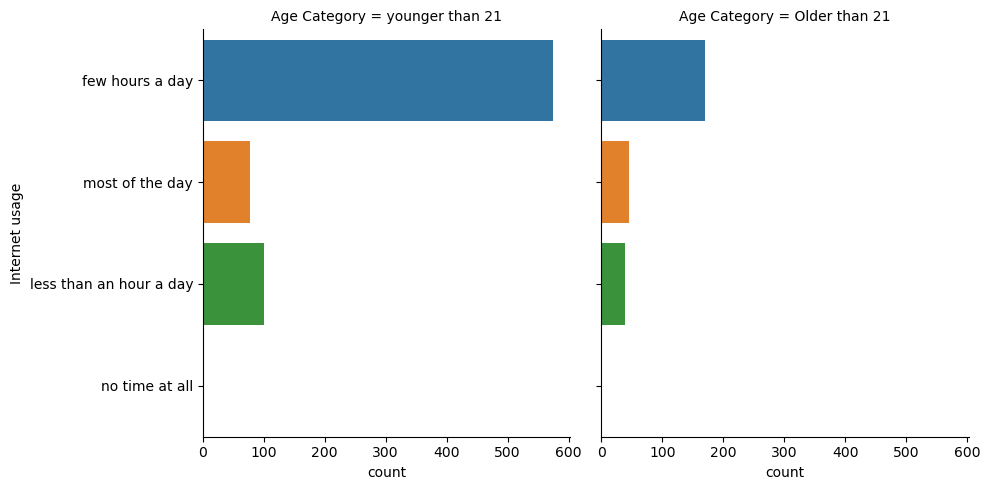

In [21]:
#6.4
survey_data["Age Category"] = "younger than 21"
survey_data.loc[survey_data["Age"]>21,"Age Category"]="Older than 21"
sns.catplot(y="Internet usage", data=survey_data,
            kind="count",
            col="Age Category")

plt.show()

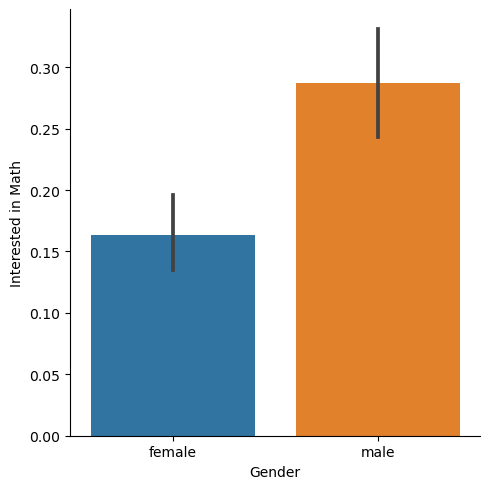

In [22]:
#6.5
sns.catplot(x="Gender", y="Interested in Math",
data=survey_data, kind="bar")

plt.show()

/var/folders/p0/1wqdw4jn1qj56r287593dsvm0000gn/T/ipykernel_5365/3276714126.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="study_time", y="G3",


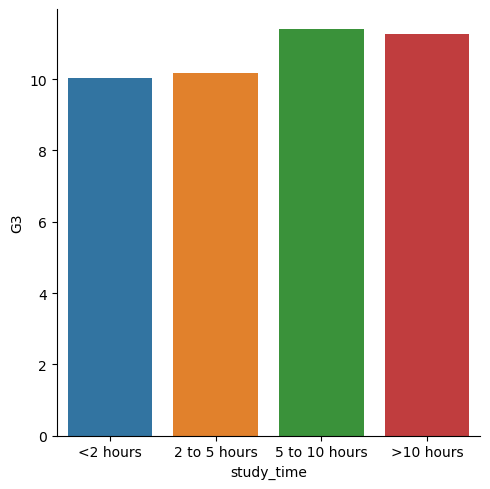

In [23]:
#6.6
# Turn off the confidence intervals
sns.catplot(x="study_time", y="G3",
            data=student_data,
            kind="bar",
            order=["<2 hours", 
                   "2 to 5 hours", 
                   "5 to 10 hours", 
                   ">10 hours"],
                   ci=None)

# Show plot
plt.show()

## <a id='boxplot'>Boxplots en Seaborn </a>

<img src="./images/figura53.png" align="center" style="float" width="1000">

Los gráficos de boxplot permiten comparar la mediana, la dispersión y la presencia de outliers de varias distribuciones.

<img src="./images/figura54.png" align="center" style="float" width="1000">

El argumento ``kind=box`` de la función ``catplot`` permite representar gráficos de boxplot con ``seaborn``.

<img src="./images/figura55.png" align="center" style="float" width="1000">

Al igual que ocurre con otras funciones de ``seaborn``, podemos utilizar el armento ``order`` para expresar el orden en el que se muestran los boxplots.

<img src="./images/figura56.png" align="center" style="float" width="1000">

Podemos eliminar los outliers  empleando el argumento ``sym=""`` que sirve para indicar el símbolo que queremos emplear para representar los outliers.

<img src="./images/figura57.png" align="center" style="float" width="1000">

Por defecto el criterio empleado para representar los "bigotes" del boxplot es de 1.5 IQR (Rango intercuartílico) . Mediante el argumento   ``whis`` podemos elegir este criterio, pudiendo seleccionar el factor por el que multiplicamos el rango intercuartílico o una lista con los percentiles mínimos y máximos de la distribución para definirio los outlier.

<img src="./images/figura58.png" align="center" style="float" width="1000">

En el gráfico anterior se muestra un ejemplo en el que se  asignan a los valores de los bigotes el valor mínimo y máximo de la distribución, de ahí que no se observen outliers.

## <a id='pointplot'>Point Plots. Coordenadas Paralelas en Seaborn </a>

<img src="./images/figura59.png" align="center" style="float" width="1000">

Los gráficos  permiten observar la mediana o la media y la dispersión de una distribución de datos.


<img src="./images/figura60.png" align="center" style="float" width="1000">

Aparentemente puede parecer que ofrecen la misma información que un gráfico de línea, pero no es así, la principal diferencia es que en el caso de los point plots, la información mostrada en el eje x es de una variable categórica.

<img src="./images/figura61.png" align="center" style="float" width="1000">

Los gráficos de barras muestran la información similar a un point plot....

<img src="./images/figura62.png" align="center" style="float" width="1000">

La función ``catplot`` permite representar gráficos de point plot empleando el argumento ``kind=point``. Por lo demás, la filosofía es muy similar al reto de gráficos que permite implemtnar ``catplot``

<img src="./images/figura63.png" align="center" style="float" width="1000">

El argumento ``join=False`` permite eliminar la línea que une los puntos.

<img src="./images/figura64.png" align="center" style="float" width="1000">

Por defecto se calcula la media de la distribución, pero el argumento ``estimator="median"`` permite calcular la mediana. No olvides importar la función ``median`` del paquete ``numpy``.

<img src="./images/figura65.png" align="center" style="float" width="1000">

<img src="./images/figura66.png" align="center" style="float" width="1000">

Se puede personalizar el gráfico añadiendo extremos a las barras del intervalo de confianza ``capsize=0.2`` o eliminando las mismas ``ci=None``.

## Ejercicio 7


* Empleando el data frame ``student_data``,  crea un gráfico de boxplot,  en el que se muestre un boxplot de la variable ``G3`` para cada una de las categorías presentes en la variable ``study_time``. Ten en cuenta que sería deseable que las categorías presentes en ``study_time`` deberían mostrarse en el gráfico de manera ordenada. 


* Empleando el data frame ``student_data``,  crea un gráfico de boxplot,  en el que se muestre un boxplot de la variable ``G3`` para cada una de las categorías presentes en la variable ``internet``. Amplia la información contenida en el gráfico utilizando el color para segmentar la información contenida en ``location``. Elimina los outliers del gráfico.


* Empleando el data frame ``student_data``,  crea un gráfico de boxplot,  en el que se muestre un boxplot de la variable ``G3`` para cada una de las categorías presentes en la variable ``romantic``. Además queremos personalizar para que los bigotes del boxplot estén dipuestos a 0.5 el rango intercuartílico. Cómo modificarías el código para que los bigotes estuvieran colocados en los valores máximos y mínimos de la distribución? 

* Crea un gráfico de coordenadas paralelas con extremos de tamaño 0.2,  en el que se muestre en el eje x la variable ``famrel`` y en el eje y la variable ``absences`` del data frame  ``student_data``. 

* Crea un gráfico de coordenadas paralelas representando la mediana, sin intervsalos de confianza,  en el que se muestre en el eje x la variable ``romantic`` y en el eje y la variable ``absences`` del data frame  ``student_data``. Segmenta los resultados en base a la variable ``school``.

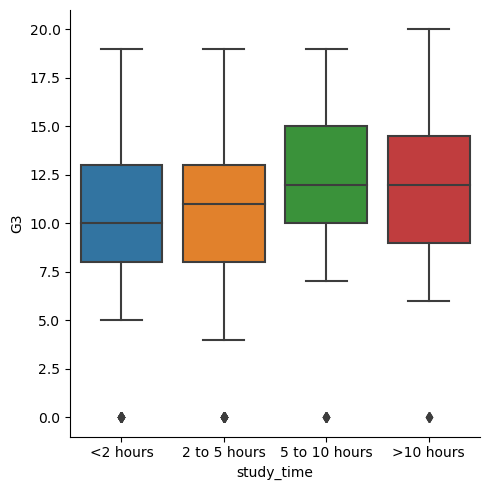

In [24]:
# 7.1
study_time_order = ["<2 hours", "2 to 5 hours", 
                    "5 to 10 hours", ">10 hours"]

sns.catplot(x="study_time",y="G3", 
            data=student_data,
            kind="box",
            order=study_time_order)


plt.show()

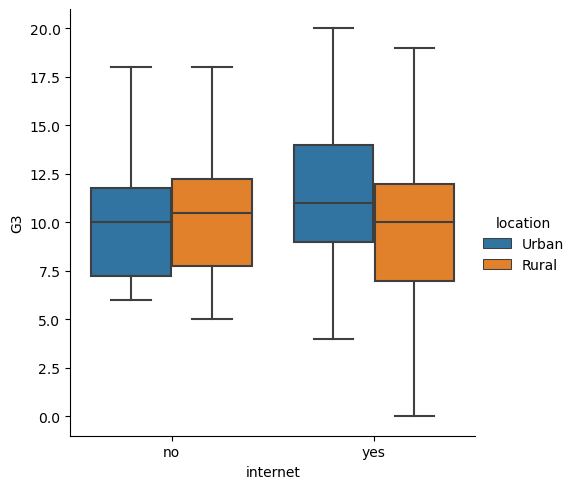

In [25]:
#7.2

# Creamos un subplot con subgrupos y omitiendo ouliers

sns.catplot(x="internet",y="G3",
            data=student_data,
            kind="box",
            hue="location",
            sym="")

plt.show()

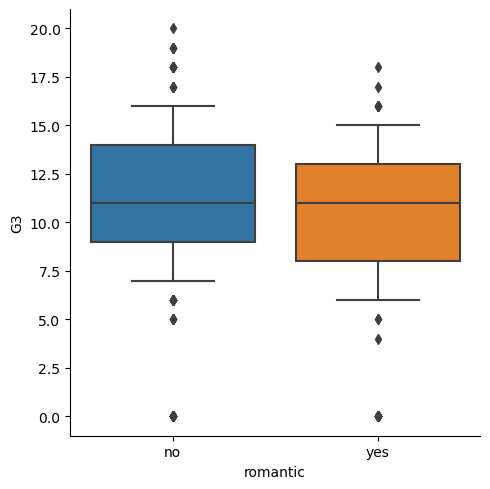

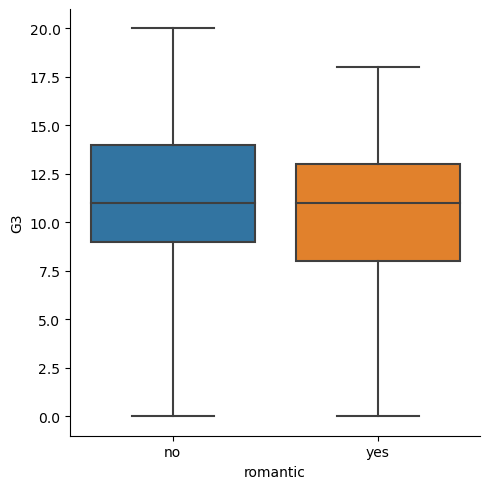

In [26]:
#7.3

sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=0.5)

plt.show()

# Para modificar los bigotes desde el mínimo al máximo de la distribución whis=[0, 100]

sns.catplot(x="romantic", y="G3",
            data=student_data,
            kind="box",
            whis=[0, 100])

plt.show()

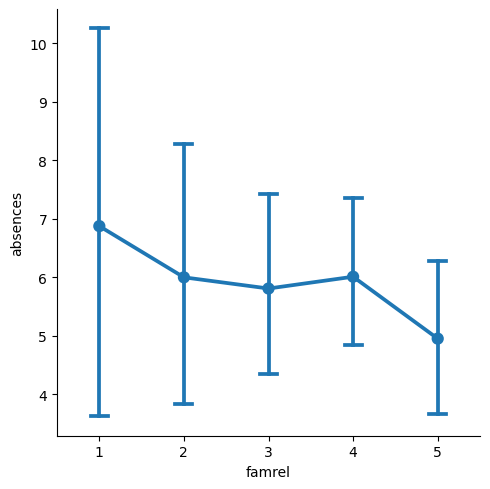

In [27]:
#7.4

sns.catplot(x="famrel", y="absences",
            data=student_data,
            kind="point",
            capsize=0.2,)

plt.show()

/var/folders/p0/1wqdw4jn1qj56r287593dsvm0000gn/T/ipykernel_5365/1789978206.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="romantic", y="absences",


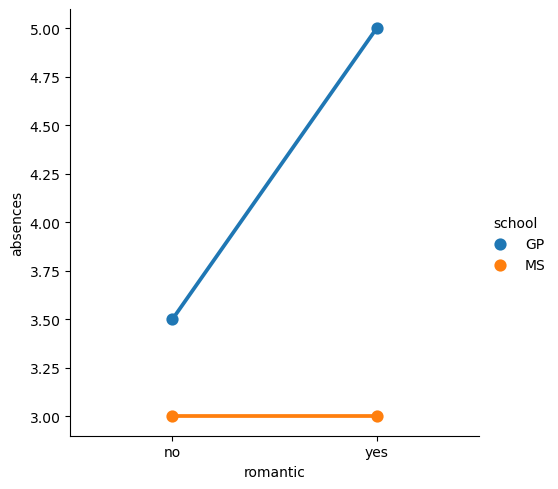

In [28]:
#7.5
from numpy import median

sns.catplot(x="romantic", y="absences",
            data=student_data,
            kind="point",
            hue="school",
            ci=None,
            estimator=median)


plt.show()

## <a id='violin'>Diagramas de violín en Seaborn </a>

Con ``seaborn``  se pueden implementar  diagramas de violín con la función ``violinplot``. Veamos un ejemplo..

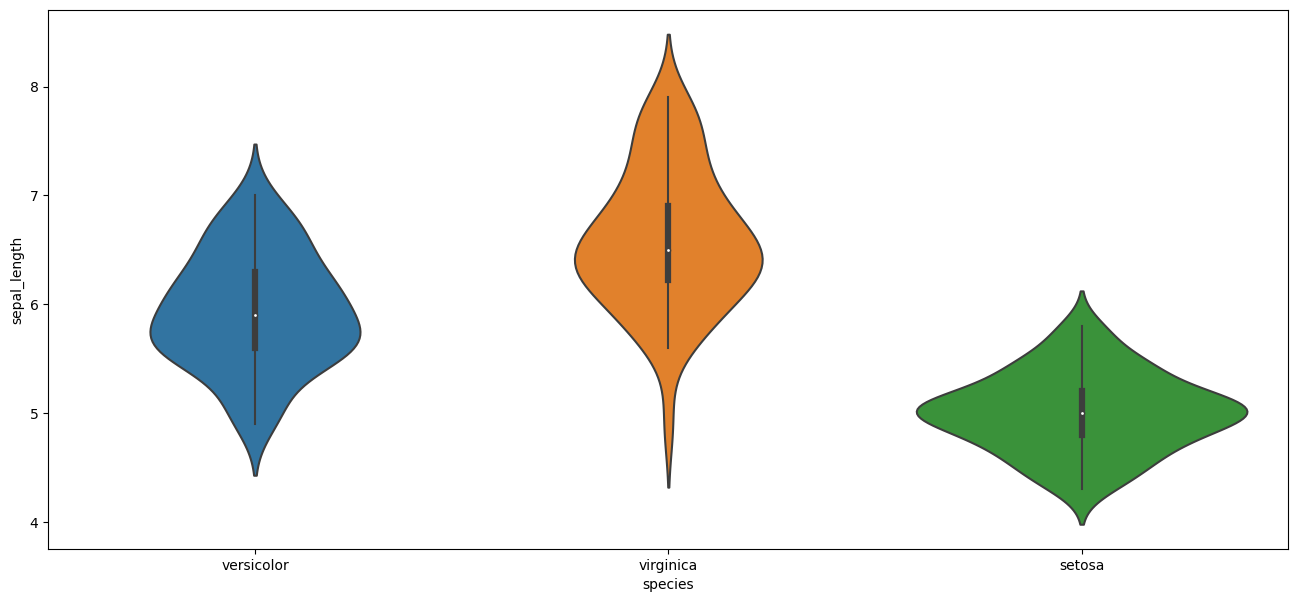

In [29]:
iris = sns.load_dataset('iris')
#plt.figure(figsize=(5,5))
sns.violinplot(x='species', y='sepal_length', data=iris,
               order=[ "versicolor", "virginica", "setosa"]);

Como en el caso de otras funciones de ``seaborn``, podemos ordenar los gráficos de cada variable con el argumento ``order``. En el siguiente ejemplo ordenamos por la mediana de  ``sepal_length``

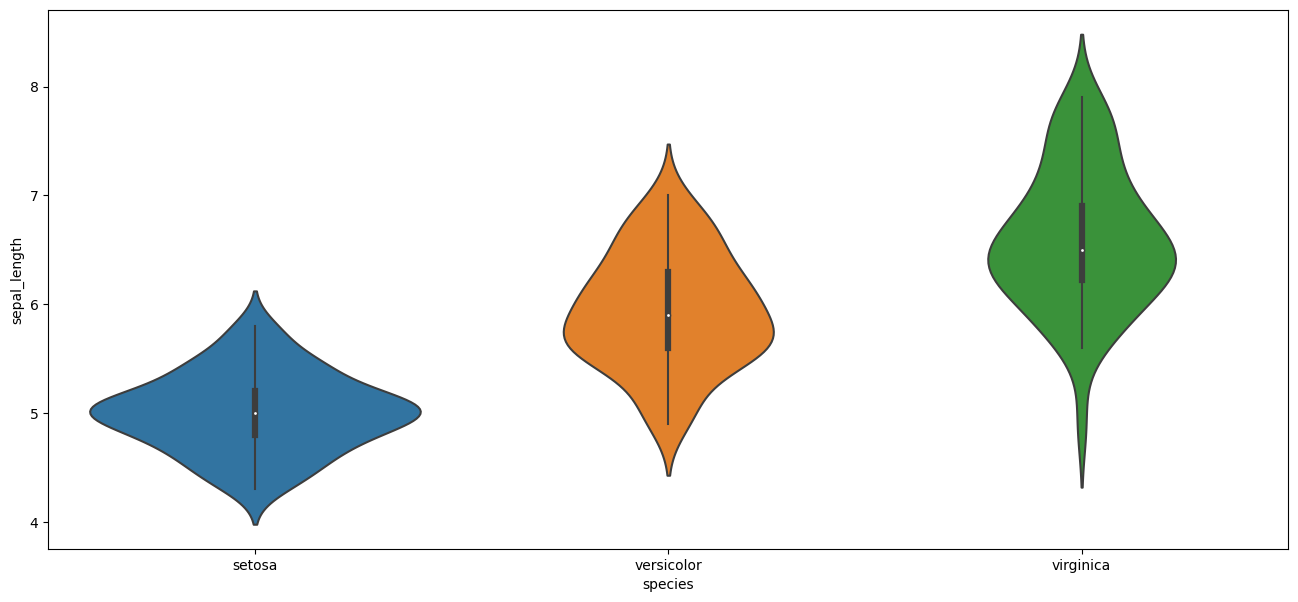

In [30]:
iris.groupby(by=["species"])["sepal_length"].median().sort_values()

orden = iris.groupby(by=["species"])["sepal_length"].median().sort_values().index
orden

sns.violinplot(x='species', y='sepal_length', data=iris,
               order=orden);


Podemos segmentar los resultados en  base a una tercera variable categórica... utilizando el color (``hue``).... y en concreto una paleta de colores (``Pastel1``)

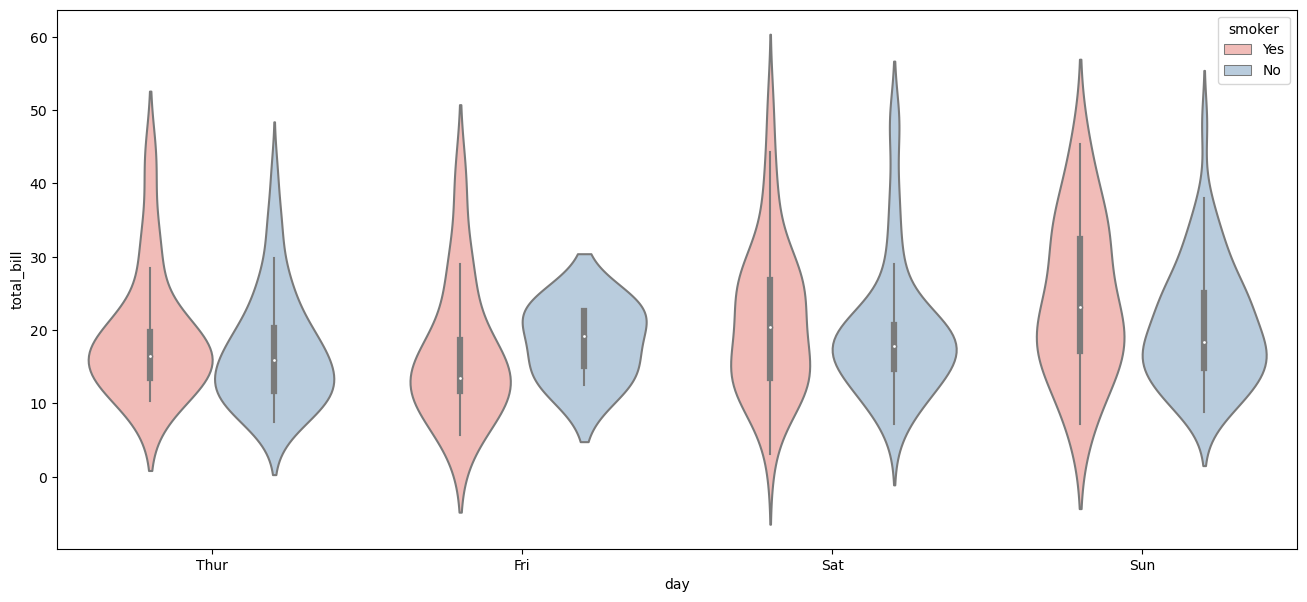

In [31]:
tips = sns.load_dataset('tips')
#plt.figure(figsize=(10,4))
sns.violinplot(data=tips, x="day", y="total_bill",
               hue="smoker",
               palette="Pastel1");

Las posibilides de personalización son muy elevadas, tenemos opciones de estilo que veremos con más detalle en la parte final del tema. Además cada tipo de gráfico permite multitud de opciones de personalización.

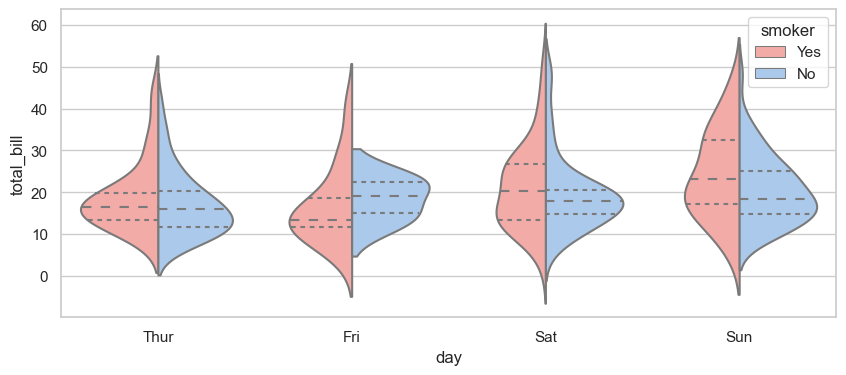

In [32]:
#Opciones de estilo que veremos más adelante
sns.set(style="whitegrid", palette="pastel", color_codes=True)
#Creamos la figura con el tamaño que queremos 
plt.figure(figsize=(10,4))

# split=True, divide el violin plot en base a la variable segmentadora.
# inner="quart" introduce los cuartiles en el gráfico

sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart",
               palette={"Yes": "r", "No": "b"})

#quita el recuadro de la figura
#sns.despine(left=True)

# resetea valores por defecto en las opciones de visualización
sns.set()

## <a id='pairs'>Gráficos de scattering emparejados en Seaborn </a>

La función ``pairplot`` de ``seaborn`` permite visualizar información de las variables numéricas de un data frame dos a dos. La información se muestra en una matriz de gráficos en la que en la diagonal se muestra el histograma de la distribución y fuera de la diagonal un gráfico de scattering de las variables dos a dos.

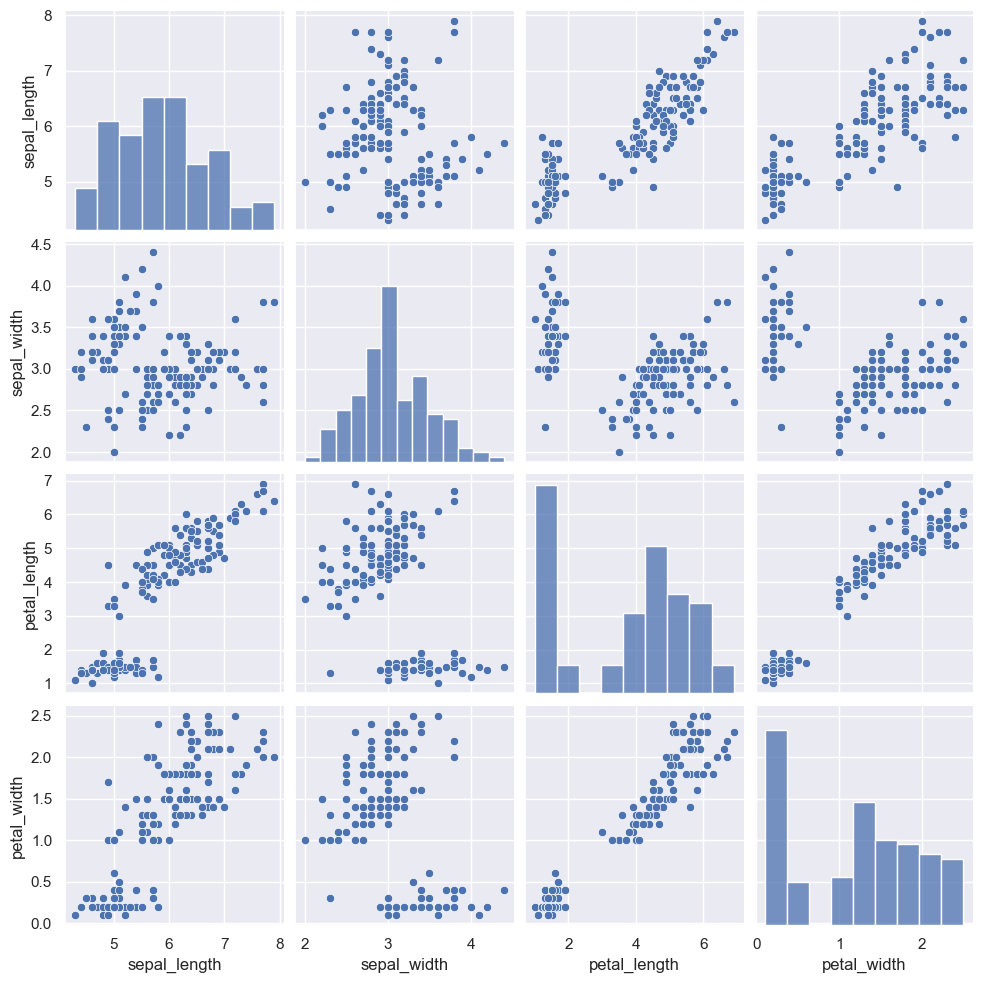

In [33]:
#sns.reset_orig() #Quita la rejilla y otras opciones de estilo
#sns.set() # Mete rejilla y ajusta una paleta por defecto
sns.pairplot(data=iris, kind="scatter");

Podemos incorporar las rectas de regresión y el intervalo de confianza a los gráficos con el argumento  ``kind="reg"``

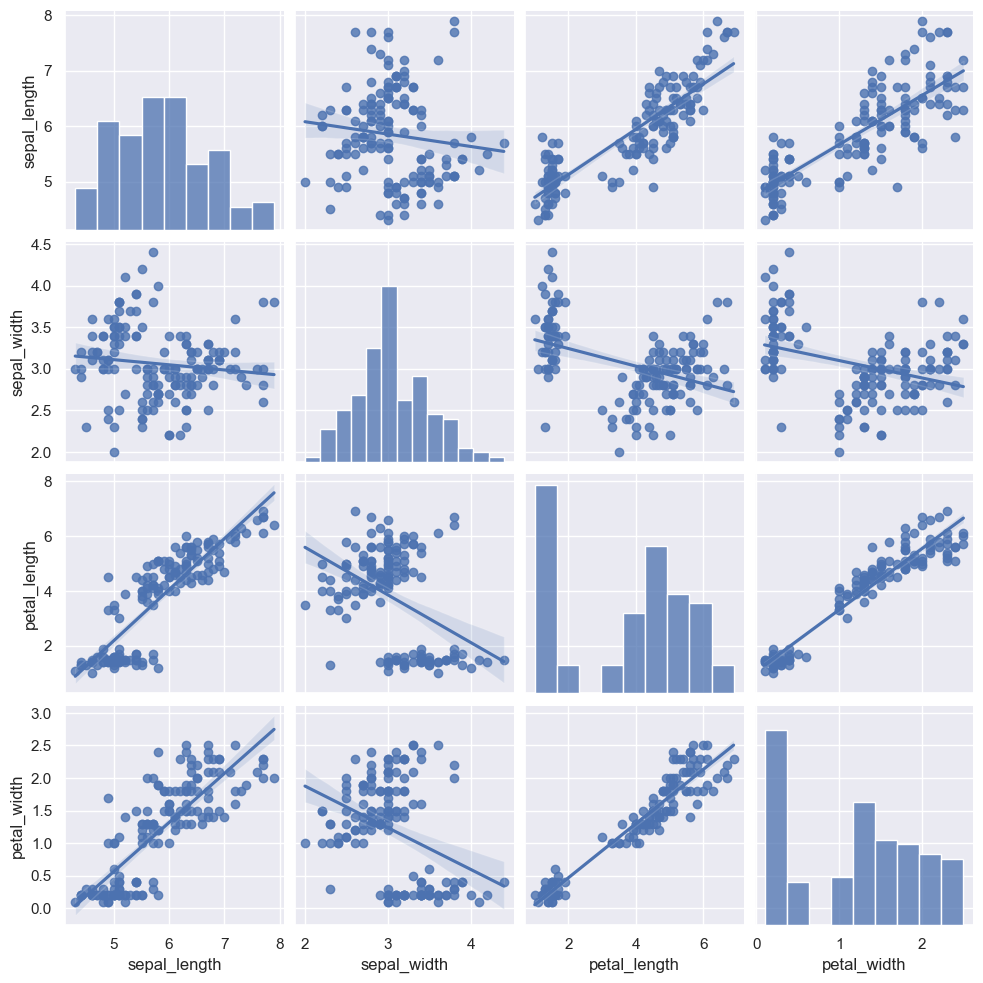

In [34]:
sns.pairplot(data=iris, kind="reg");

Segmentar con el color los resultados en base a una  tercera variable categórica puede ser muy informativo, en el siguiente ejemplo segmentaremos en base a la variable ``species``. 

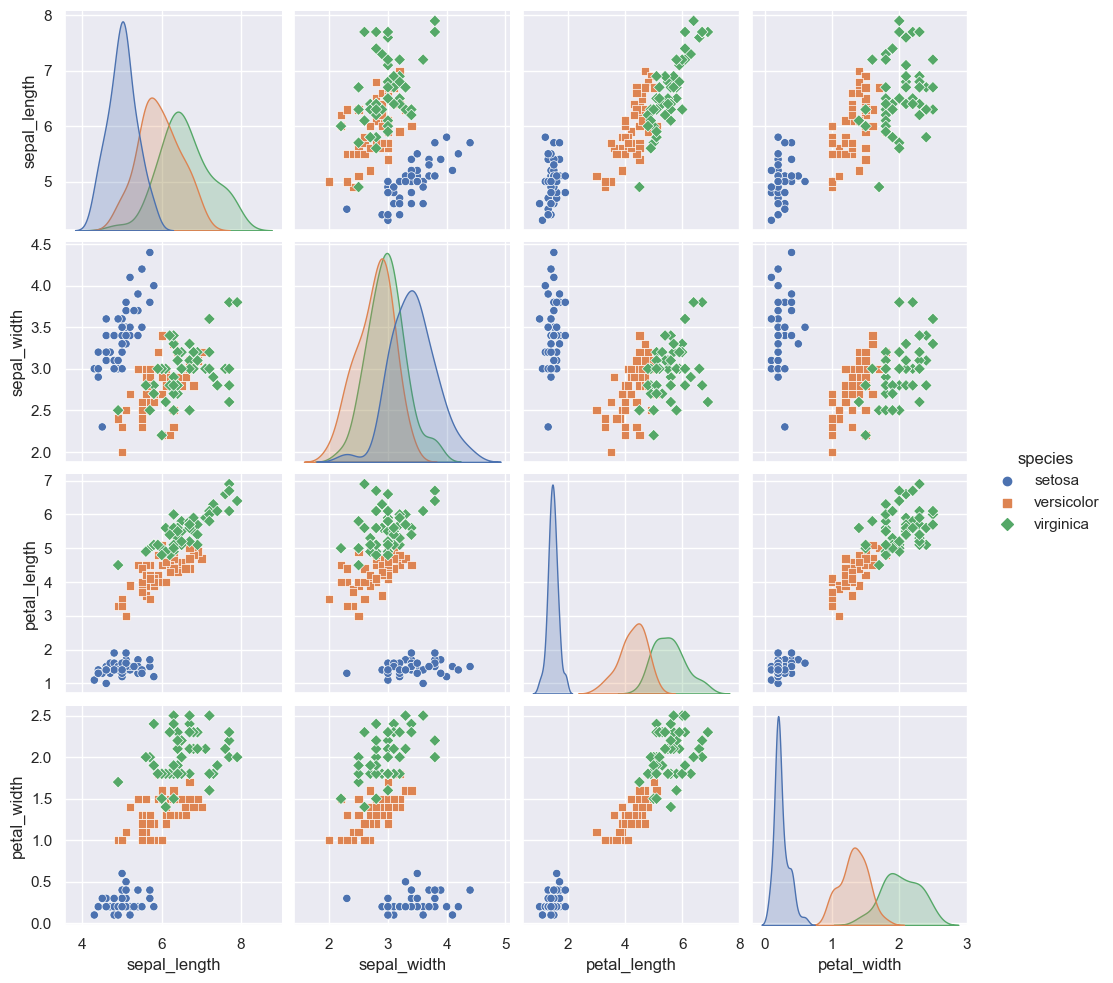

In [35]:
sns.pairplot(data=iris, kind="scatter", hue="species", markers=["o", "s", "D"]);

Lo mismo, pero con recta de regresión

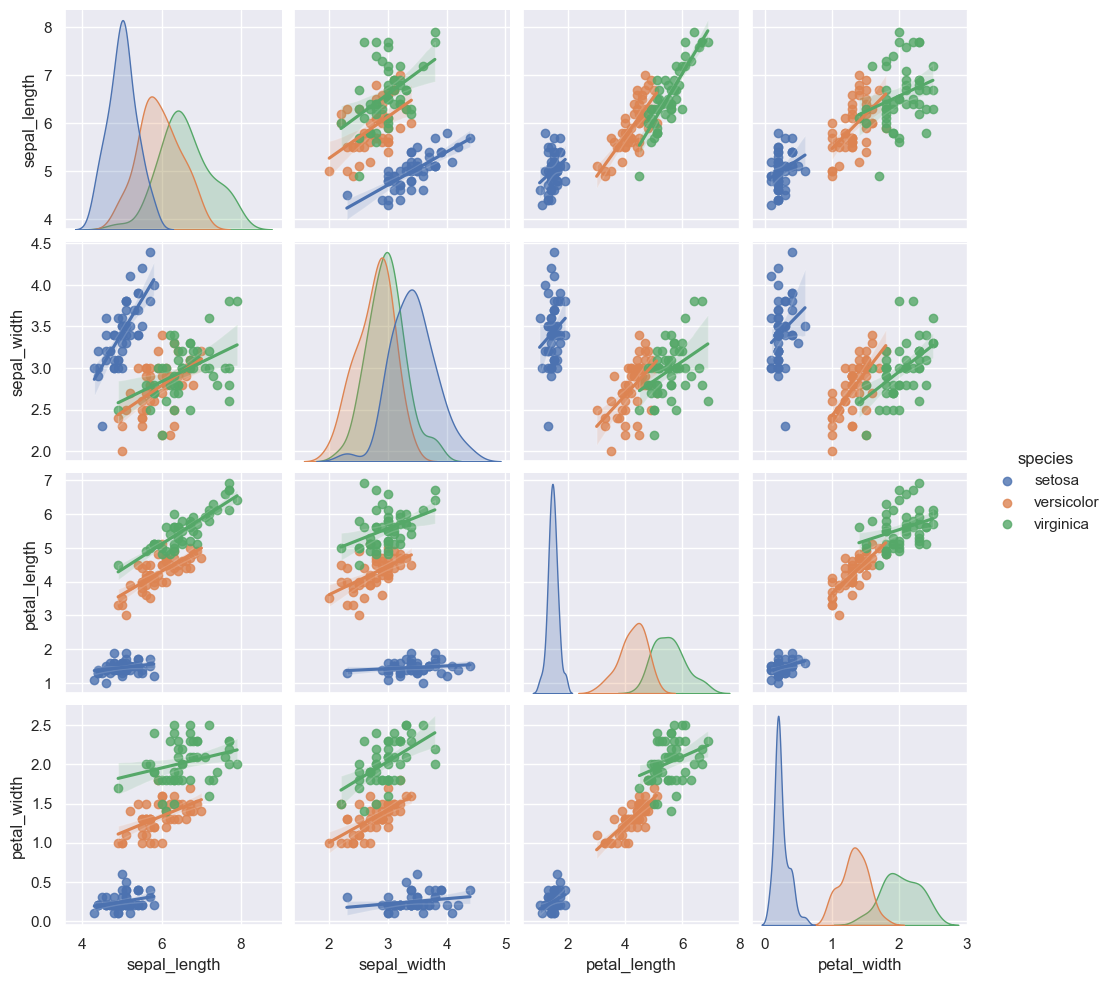

In [36]:
sns.pairplot(data=iris, hue="species", kind="reg");

Como deciamos antes, las posibilidades de personalización son infinitas, no dudes en consultar la documentación de la librería.

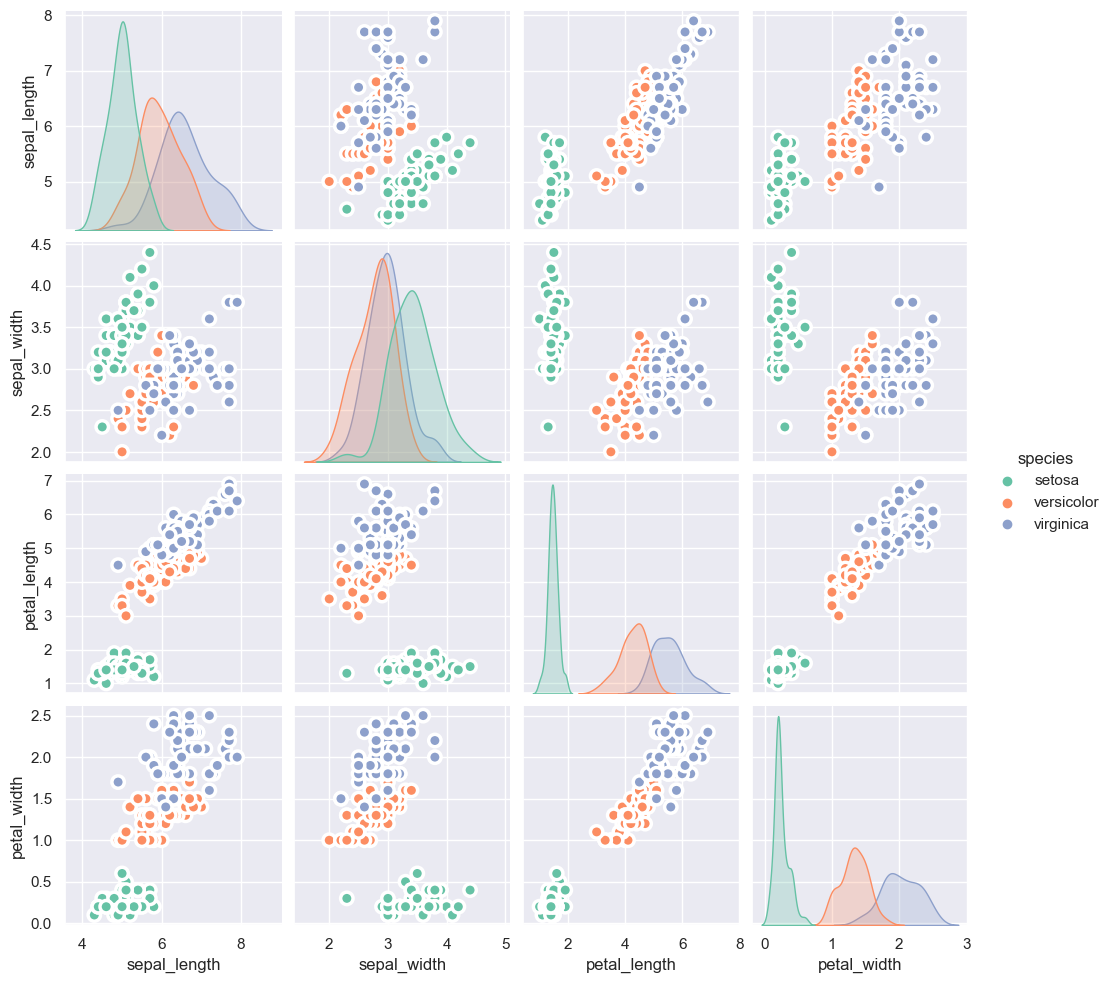

In [37]:
# se pueden cambiar otras opciones de visualización a través de plot_kws:
sns.pairplot(iris, kind="scatter", hue="species", palette="Set2",
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5));

## <a id='custom2'>Personalizando a través del estilo en Seaborn </a>

<img src="./images/figura67.png" align="center" style="float" width="1000">

Bien sea por puras preferencias personales, el tipo de audiencia o ayudar a interpretar los gráficos puede ser interesante cambiar el estilo de los gráficos. 

<img src="./images/figura68.png" align="center" style="float" width="1000">

La función ``set_style`` de seaborn permite ajustar alguno de los estilos predefinidos de seaborn ``white``,  ``dark``,  ``whitegrid``,  ``darkgrid`` o ``ticks``. A continuación veremos ejemplos de algunos de los estilos mencionados.

<img src="./images/figura69.png" align="center" style="float" width="1000">


<img src="./images/figura70.png" align="center" style="float" width="1000">


<img src="./images/figura71.png" align="center" style="float" width="1000">



<img src="./images/figura72.png" align="center" style="float" width="1000">

<img src="./images/figura73.png" align="center" style="float" width="1000">

También podemos cambiar la paleta de colores empleando la función ``set_palette`` de Seaborn.

<img src="./images/figura74.png" align="center" style="float" width="1000">

Existen paletas de colores predefinidas de varios tipos. En primer lugar veremos las paletas  **Divergentes**, el color neutral está en el centro de la paleta. Veamos dos ejemplos para ver la diferencia definida por defecto y una paleta divergente.

<img src="./images/figura75.png" align="center" style="float" width="1000">


<img src="./images/figura76.png" align="center" style="float" width="1000">


<img src="./images/figura77.png" align="center" style="float" width="1000">

**Secuenciales**, el color neutral esta en la parte baja de la paleta. Veamos un  ejemplo para ver como se ve una paleta secuencial.

<img src="./images/figura78.png" align="center" style="float" width="1000">


<img src="./images/figura79.png" align="center" style="float" width="1000">


<img src="./images/figura80.png" align="center" style="float" width="1000">

Se pueden personalizar las paletas definiendo una lista de colores,  bien utilizando nombres de colores o con su código html.

<img src="./images/figura81.png" align="center" style="float" width="1000">

La función ``set_context`` permite personalizar los estilos de la escala (etiquetas, tamños de fiuentes y ejes, etc...). Los "context " que proporciona seaborn son, de menor a mayor tamaño ``paper``, ``notebook``, ``talk`` y ``poster``.  Veamos un par de ejemplos

<img src="./images/figura82.png" align="center" style="float" width="1000">


<img src="./images/figura83.png" align="center" style="float" width="1000">



## <a id='Titles'>Títulos y etiquetas en ejes x e y. </a>

<img src="./images/figura84.png" align="center" style="float" width="1000">

La correcta disposición de titulos, etiquetas en los ejes y su correcta orientación es fundamental para comprender adecuadamente un gráfico


<img src="./images/figura85.png" align="center" style="float" width="1000">

Seaborn crea dos tipos de objetos ``Facetgrid`` y ``AxesSubplot``

<img src="./images/figura86.png" align="center" style="float" width="1000">


<img src="./images/figura87.png" align="center" style="float" width="1000">


Dependiendo del tipo de objeto la función a emplear para poner el título será diferente. ``Facetgrid`` y ``AxesSubplot``

<img src="./images/figura88.png" align="center" style="float" width="1000">

En los objetos  ``Facetgrid``, hay que utilizar el método ``fig.suptitle`` del objeto facetgrid.

<img src="./images/figura89.png" align="center" style="float" width="1000">

Con el argumento ``y`` del método ``fig.suptitle``podemos  variar la altura relativa del título de la figura.

<img src="./images/figura90.png" align="center" style="float" width="1000">

En los objetos  ``AxesSubplot``, hay que utilizar el método ``set_title`` del objeto AxesSubplot.

<img src="./images/figura91.png" align="center" style="float" width="1000">


<img src="./images/figura92.png" align="center" style="float" width="1000">

Cuando tenemos un objeto ``Facetgrid`` pero queremos colocar un titulo a cada gráfico que compone el subplot, utilizaremos el método ``set_titles``. Fíjate que varia en la última "s" respecto a la forma de poner un título a  un objeto ``AxesSubplot``.

<img src="./images/figura93.png" align="center" style="float" width="1000">


Las etiquetas de los ejes se fijan mediante el método ``set(xlabel="Etiqueta X", ylabel="Etiqueta y)``, y se hace igual en los objetos  ``Facetgrid`` y ``AxesSubplot``.

<img src="./images/figura94.png" align="center" style="float" width="1000">

Si los ticks del eje x se solapan, puede ser una buena idea rotar los ticks 90 grados con la ayuda de la función de matplotlib  ``plt.xticks(rotation=90)``.

## Ejercicio 8

* Carga el conjunto de datos contenido en el fichero ``../data_seaborn_jgx/mpg.csv``.

* Crea un gráfico de línea empleando la función de seaborn ``lineplot`` representando en el eje x la variable ``model_year`` y en el eje y la variable ``mpg`` sin intervalo de confianza. Representa una una curva por cada valor de la variable ``origin`` en diferentes colores. Averigua si ``lineplot`` crea un objeto de tipo ``AxesSubplot`` o ``FacetGrid`` para emplear la función adecuada para poner el título ``Average MPG Over Time``. Añade etiquetas a los ejes x ``Car Model Year`` y al eje y ``Average MPG``

* Crea un gráfico de coordenadas paralelas  (point plot) empleando la función ``catplot`` de seaborn. Representa en el eje x la variable ``origin`` y en el eje y ``acceleration``. Segementa el resultado para los años 75,76, 77 y 78 (filtra previamente el dataframe) en cuatro subplots dispuestos en una matriz 2x2. Añade el título a la figura ``Relación entre la aceleración y el origen del vehículo`` y el título ``Año {col_name}`` a cada gráfico del subplot y etiquetas en los ejes x (``País de origen``) e y (``Aceleración``).



In [38]:
#8.1
mpg = pd.read_csv("../data_seaborn_jgx/mpg.csv", delimiter=',')
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

/var/folders/p0/1wqdw4jn1qj56r287593dsvm0000gn/T/ipykernel_5365/2772520792.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(x="model_year", y="mpg",


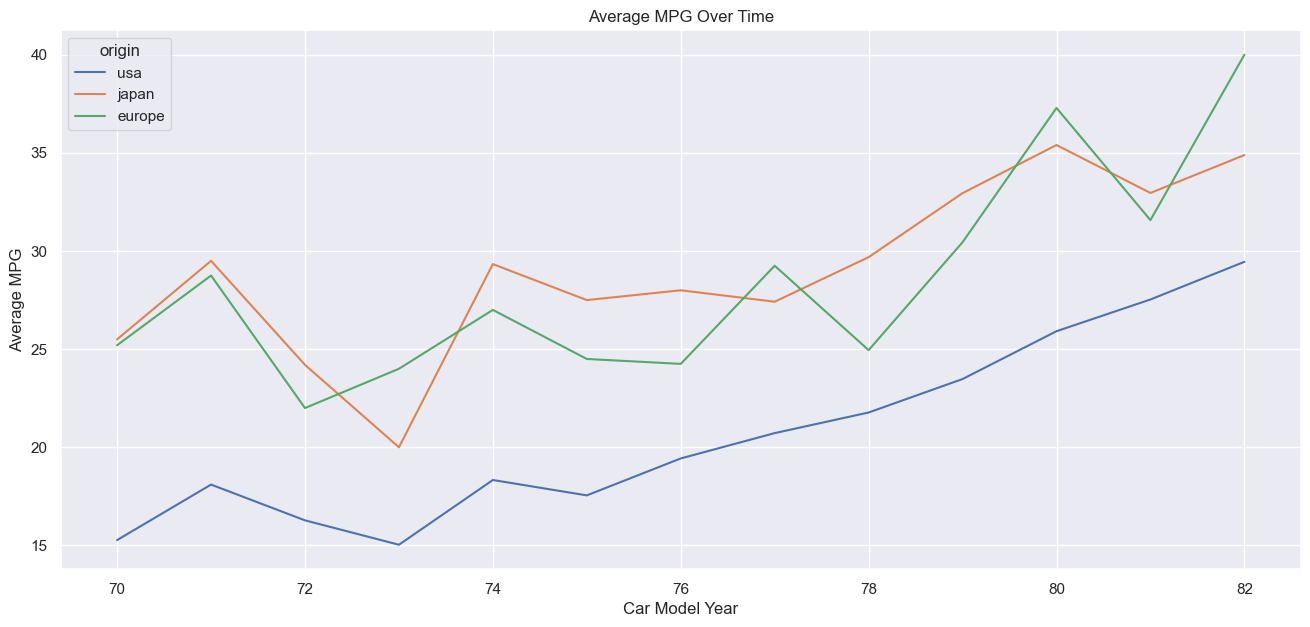

In [39]:
#8.2
g = sns.lineplot(x="model_year", y="mpg", 
                 data=mpg,
                 hue="origin",
                ci=None)
type(g)


#Es de tipo  ``AxesSubplot`` conlo cual hay que utilizar el método set_title
g.set_title("Average MPG Over Time")

#Si hubiera sido de tipo ``FacetGrid`` hubieramos tenido que utilizar el método .fig.suptitle

g.set(xlabel="Car Model Year",
      ylabel="Average MPG")

plt.show()

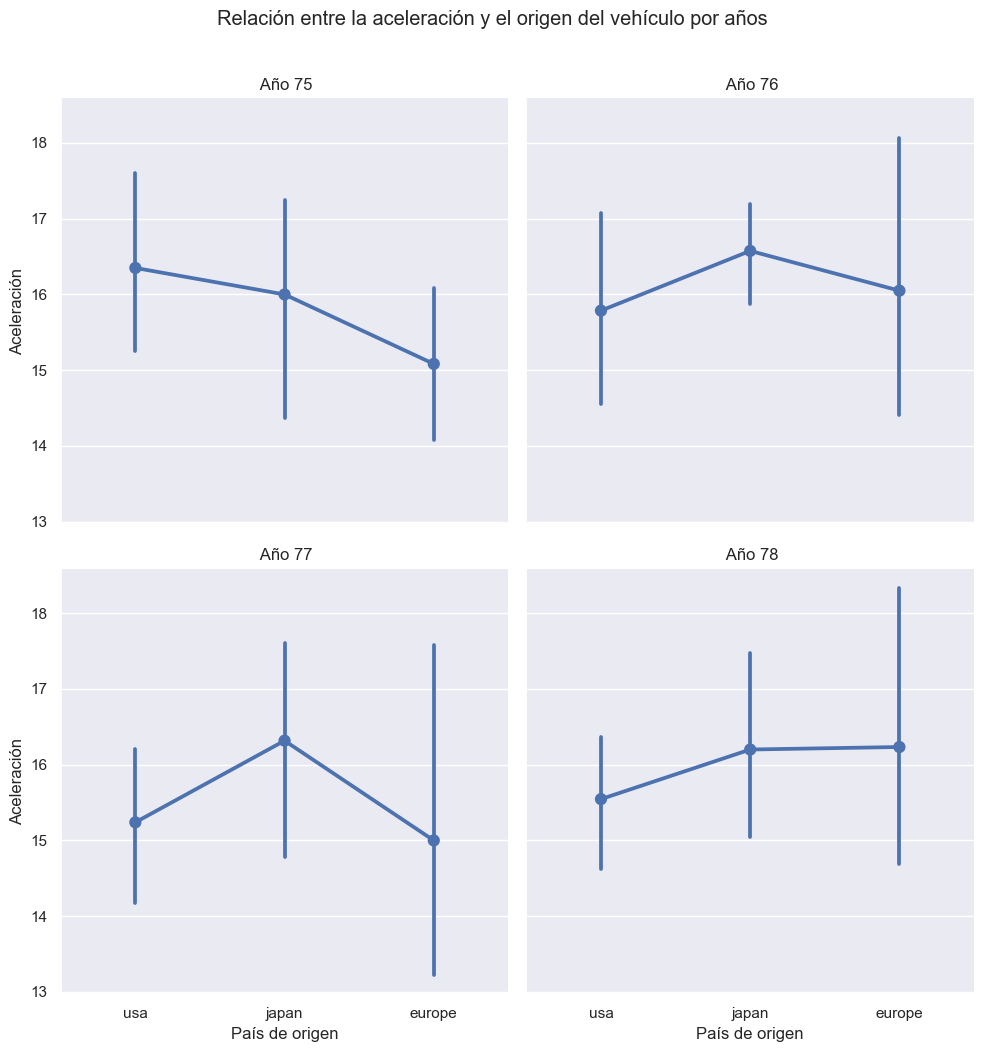

In [40]:
#8.3

#Filtramos los años 75,76, 77 y 78

mpg_clean=mpg.loc[(mpg["model_year"]==75) | (mpg["model_year"]==76) | 
                  (mpg["model_year"]==77)| (mpg["model_year"]==78) ,:]
mpg_clean.head()
g=sns.catplot(x="origin", 
            y="acceleration", 
            data=mpg_clean, 
            kind="point",
            col="model_year",
            col_wrap=2)

#Título de la figura, de tipo facetgrid
g.fig.suptitle("Relación entre la aceleración y el origen del vehículo por años",y=1.05)

#Etiquetas
g.set(xlabel="País de origen",
      ylabel="Aceleración")


#Título de cada subplot
g.set_titles(" Año {col_name}")

plt.show()